In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
from keras.datasets import fashion_mnist
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [19]:
model = Sequential([Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),MaxPooling2D((2,2)),Flatten(),Dense(128,activation='relu'),Dense(10,activation='softmax')])

In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

In [31]:
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2, callbacks=[callback])

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.7816 - loss: 4.2326 - val_accuracy: 0.8725 - val_loss: 0.3641
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.8938 - loss: 0.2981 - val_accuracy: 0.8907 - val_loss: 0.3162
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9156 - loss: 0.2324 - val_accuracy: 0.8953 - val_loss: 0.3091
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9260 - loss: 0.2030 - val_accuracy: 0.8922 - val_loss: 0.3114
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9374 - loss: 0.1703 - val_accuracy: 0.8865 - val_loss: 0.3524
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9388 - loss: 0.1617 - val_accuracy: 0.8881 - val_loss: 0.3514


In [32]:
history.history

{'accuracy': [0.8315833210945129,
  0.8933749794960022,
  0.9132291674613953,
  0.9247083067893982,
  0.9326249957084656,
  0.9361666440963745],
 'loss': [1.3627023696899414,
  0.3034614324569702,
  0.2426138073205948,
  0.2082725465297699,
  0.18253812193870544,
  0.16797234117984772],
 'val_accuracy': [0.8725000023841858,
  0.890749990940094,
  0.8953333497047424,
  0.8921666741371155,
  0.8865000009536743,
  0.8880833387374878],
 'val_loss': [0.36411672830581665,
  0.31619367003440857,
  0.3091045916080475,
  0.31137076020240784,
  0.352428674697876,
  0.35139310359954834]}

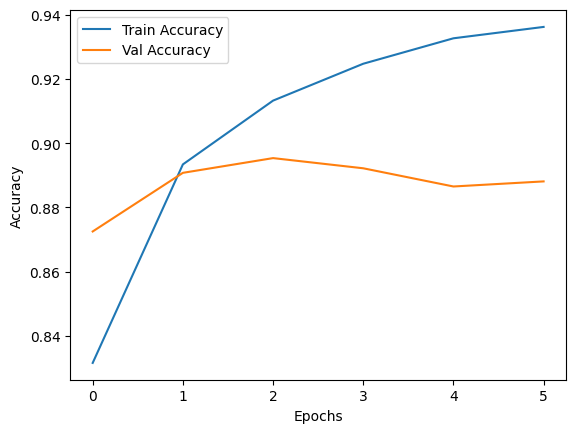

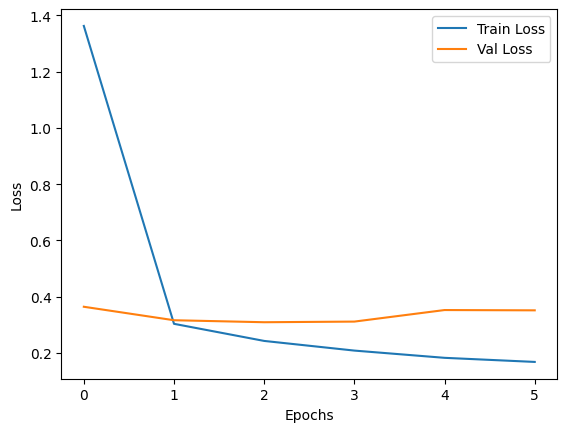

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [34]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [35]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8837